In [1]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform, cdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("phoible.csv")

/tmp/ipykernel_6684/3549965252.py:1: DtypeWarning: Columns (4,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("phoible.csv")


In [3]:
unique_segments = df.drop_duplicates(subset='Phoneme')

In [4]:
feature_matrix = unique_segments[['Phoneme', 'tone', 'stress', 'syllabic', 'short', 'long', 'consonantal',
       'sonorant', 'continuant', 'delayedRelease', 'approximant', 'tap',
       'trill', 'nasal', 'lateral', 'labial', 'round', 'labiodental',
       'coronal', 'anterior', 'distributed', 'strident', 'dorsal', 'high',
       'low', 'front', 'back', 'tense', 'retractedTongueRoot',
       'advancedTongueRoot', 'periodicGlottalSource', 'epilaryngealSource',
       'spreadGlottis', 'constrictedGlottis', 'fortis', 'lenis',
       'raisedLarynxEjective', 'loweredLarynxImplosive', 'click']].set_index("Phoneme")

In [27]:
koine_3_bc_mapping = {
    "i": "ι",
    "iː": "ι",
    "y": "υ",
    "yː": "υ",
    "u": "ου",
    "uː": "ου",
    "e": "ε",
    "eː": "ε",
    "o": "ο",
    "oː": "ω",
    "a": "α",
    "aː": "α",
    "p": "π",
    "b": "β",
    "pʰ": "φ",
    "m": "μ",
    "t": "τ",
    "tʰ": "θ",
    "d": "δ",
    "n": "ν",
    "s": "σ",
    "l": "λ",
    "r": "ρ",
    "r̥": "ρ",
    "k": "κ",
    "ɡ": "γ",
    "kʰ": "χ",
    "h": "χ",
    "yi̯": "υι",
    "eu̯": "ευ",
    "oi̯": "οι",
    "ai̯": "αι",
    "aːi̯": "αϊ",
    "au̯": "αυ"
}


/tmp/ipykernel_6684/194302401.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  koine_3_bc_features = feature_matrix.loc[koine_3_bc_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


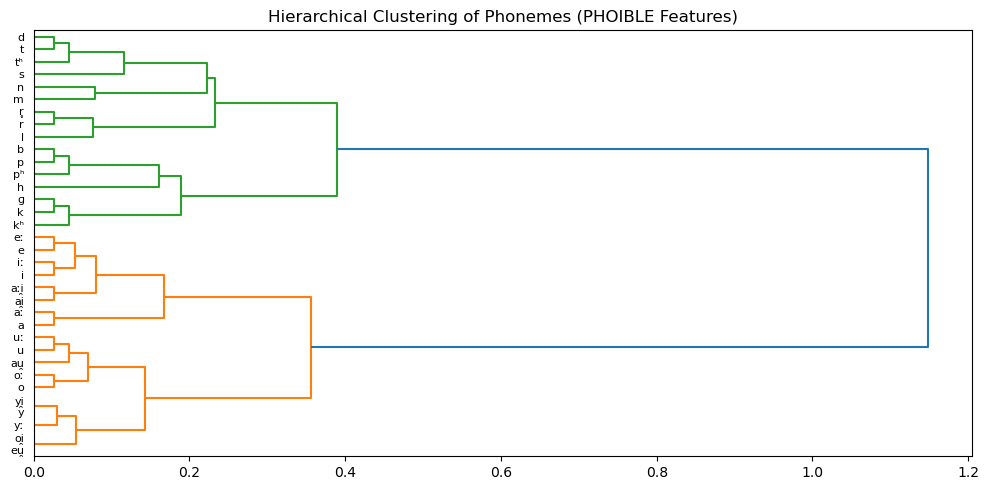

In [5]:
koine_3_bc_phonemes = ["i", "iː", "y", "yː", "u", "uː", "e", "eː", "o", "oː", "a", "aː"] + ["p", "b", "pʰ", "m", "t", "tʰ", "d", "n", "s", "l", "r", "r̥", "k", "ɡ", "kʰ", "h"] + ["yi̯", "eu̯", "oi̯", "ai̯", "aːi̯", "au̯"] # "eːu̯", "oːi̯", 
koine_3_bc_features = feature_matrix.loc[koine_3_bc_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)
koine_3_bc_distance = pdist(koine_3_bc_features.values, metric='hamming')  # Hamming is ideal for binary

# Generate linkage matrix
Z = linkage(koine_3_bc_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=koine_3_bc_features.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes (PHOIBLE Features)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_6684/1341733914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  koine_2_bc_features = feature_matrix.loc[koine_2_bc_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


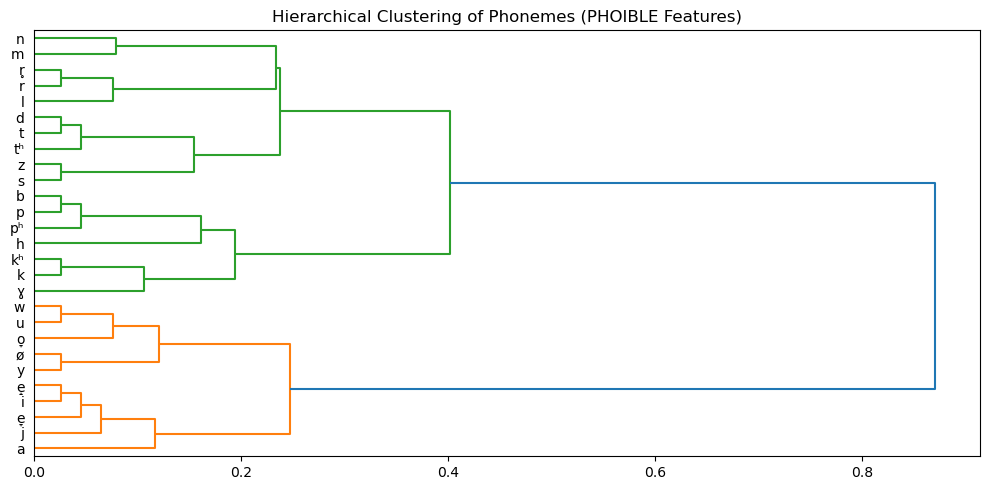

In [17]:
koine_2_bc_phonemes = ["i", "y", "u", "e̝", "e̞", "o̞", "ø", "a"] + ["p", "b", "pʰ", "m", "t", "tʰ", "d", "n", "s", "z", "l", "r", "r̥", "k", "ɣ", "kʰ", "h", "w", "j"]
koine_2_bc_features = feature_matrix.loc[koine_2_bc_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)
koine_2_bc_distance = pdist(koine_2_bc_features.values, metric='hamming')  # Hamming is ideal for binary

# Generate linkage matrix
Z = linkage(koine_2_bc_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=koine_2_bc_features.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes (PHOIBLE Features)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_6684/238423179.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  koine_4_ad_features = feature_matrix.loc[koine_4_ad_phonemes].replace({'+': 1, '-': 0, '1': 0.5, '1': 0.5}).fillna(0).astype(int)


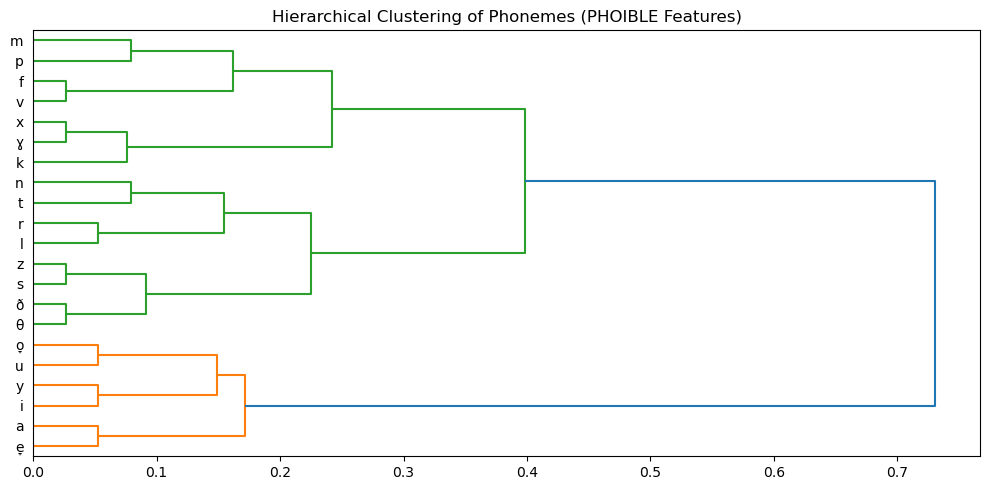

In [18]:
koine_4_ad_phonemes = ["i", "y", "u", "e̞", "o̞", "a"] + ["p", "v", "f", "m", "t", "θ", "ð", "n", "s", "z", "l", "r", "k", "ɣ", "x"]
koine_4_ad_features = feature_matrix.loc[koine_4_ad_phonemes].replace({'+': 1, '-': 0, '1': 0.5, '1': 0.5}).fillna(0).astype(int)
koine_4_ad_distance = pdist(koine_4_ad_features.values, metric='hamming')  # Hamming is ideal for binary

# Generate linkage matrix
Z = linkage(koine_4_ad_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=koine_4_ad_features.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes (PHOIBLE Features)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_6684/3295172549.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medieval_14_ad_features = feature_matrix.loc[medieval_14_ad_phonemes].replace({'+': 1, '-': 0, '1': 0.5, '1': 0.5}).fillna(0).astype(int)


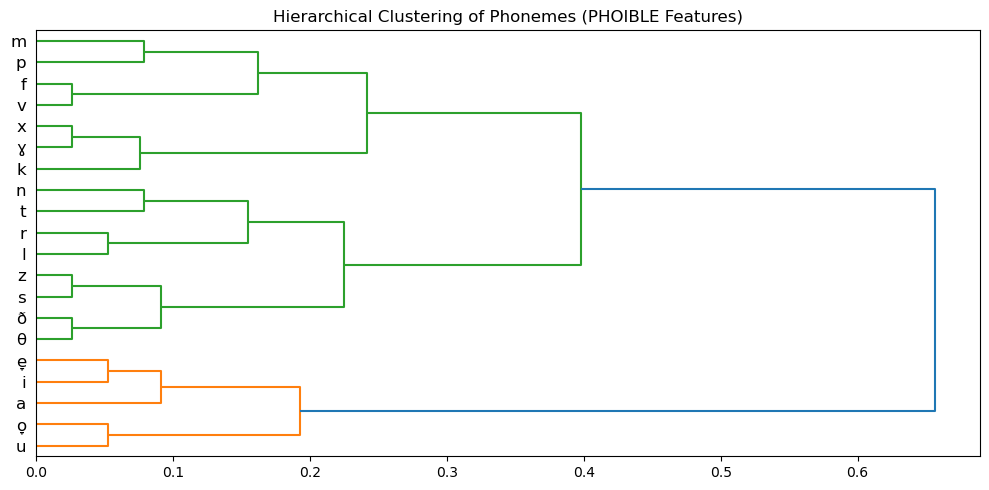

In [19]:
medieval_14_ad_phonemes = ["i", "u", "e̞", "o̞", "a"] + ["p", "v", "f", "m", "t", "θ", "ð", "n", "s", "z", "l", "r", "k", "ɣ", "x"]
medieval_14_ad_features = feature_matrix.loc[medieval_14_ad_phonemes].replace({'+': 1, '-': 0, '1': 0.5, '1': 0.5}).fillna(0).astype(int)
medieval_14_ad_distance = pdist(medieval_14_ad_features.values, metric='hamming')  # Hamming is ideal for binary

# Generate linkage matrix
Z = linkage(medieval_14_ad_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=medieval_14_ad_features.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes (PHOIBLE Features)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_6684/694580261.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sahidic_features = feature_matrix.loc[sahidic_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


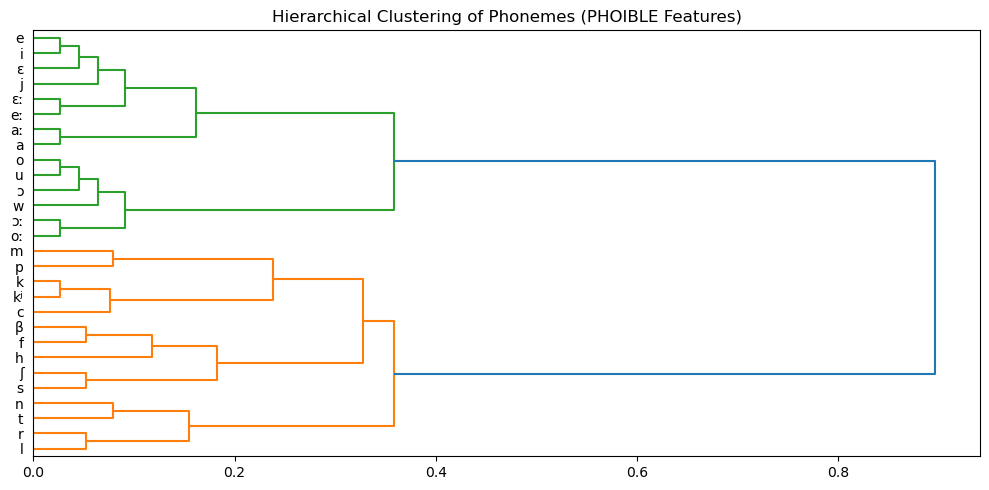

In [20]:
sahidic_phonemes = ["i", "u", "e", "eː", "ɛ", "ɛː", "o", "oː", "ɔ", "ɔː", "a", "aː"] + ["p", "m", "f", "β", "t", "n", "s", "l", "r", "ʃ", "c", "j", "kʲ", "k", "w", "h"] #+ ["au̯", "aːu̯", "ai̯", "ɛi̯", "ɔi̯", "ei̯", "ui̯", "iu̯", "ɔu̯"] #"ɔːu", 
sahidic_features = feature_matrix.loc[sahidic_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)
sahidic_distance = pdist(sahidic_features.values, metric='hamming')  # Hamming is ideal for binary

# Generate linkage matrix
Z = linkage(sahidic_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=sahidic_features.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes (PHOIBLE Features)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_6684/3858990886.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bohairic_features = feature_matrix.loc[bohairic_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


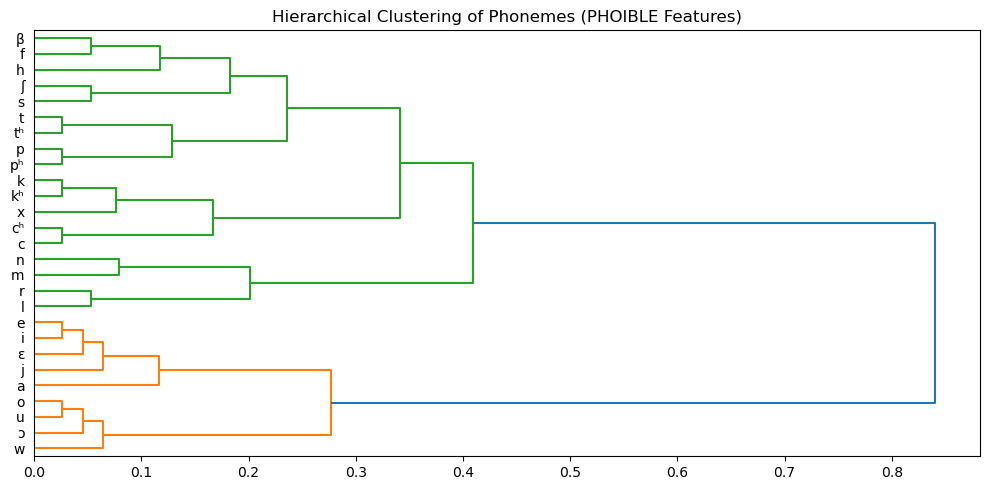

In [21]:
bohairic_phonemes = ["i", "u", "e", "ɛ", "o", "ɔ", "a"] + ["pʰ", "p", "m", "f", "β", "tʰ", "t", "n", "s", "l", "r", "ʃ", "c", "j", "cʰ", "kʰ", "k", "w", "x", "h"] #+ ["ai̯", "au̯", "ɛu̯", "ɔi̯", "ei̯", "eu̯", "oi̯", "ou̯", "iu̯", "ui̯"]
bohairic_features = feature_matrix.loc[bohairic_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)
bohairic_distance = pdist(bohairic_features.values, metric='hamming')  # Hamming is ideal for binary

# Generate linkage matrix
Z = linkage(bohairic_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=bohairic_features.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes (PHOIBLE Features)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_6684/193358254.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fayyumic_features = feature_matrix.loc[fayyumic_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)


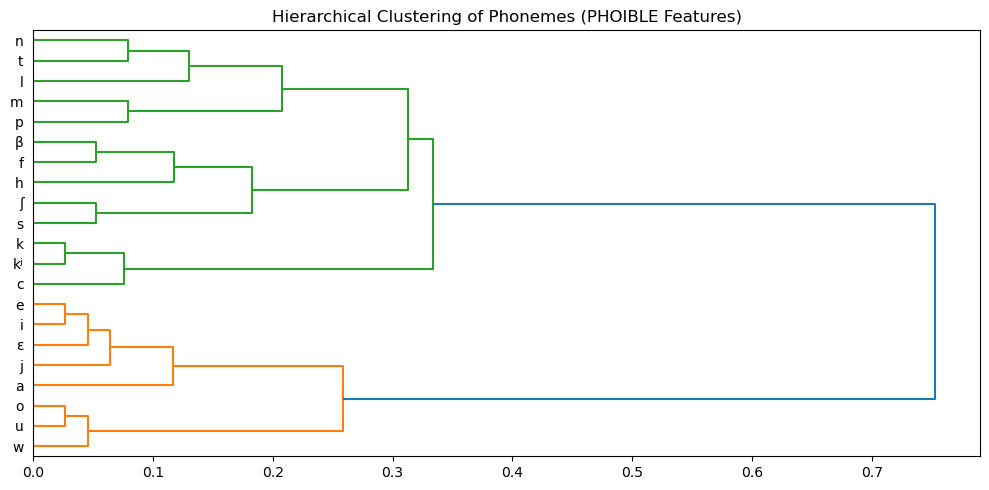

In [22]:
fayyumic_phonemes = ["i", "u", "e", "ɛ", "o", "a"] + ["p", "m", "f", "β", "t", "n", "s", "l", "ʃ", "c", "j", "kʲ", "k", "w", "h"] #+ ["ai̯", "au̯", "aːu̯", "ɛi̯", "ɛu̯", "ei̯", "eu̯", "oi̯", "ou̯", "iu̯", "ui̯"] # "eːu"
fayyumic_features = feature_matrix.loc[fayyumic_phonemes].replace({'+': 1, '-': 0, '+,-': 1, '-,+': 1}).fillna(0).astype(int)
fayyumic_distance = pdist(fayyumic_features.values, metric='hamming')  # Hamming is ideal for binary

# Generate linkage matrix
Z = linkage(fayyumic_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=fayyumic_features.index.tolist(), orientation='right')
plt.title("Hierarchical Clustering of Phonemes (PHOIBLE Features)")
plt.tight_layout()
plt.show()


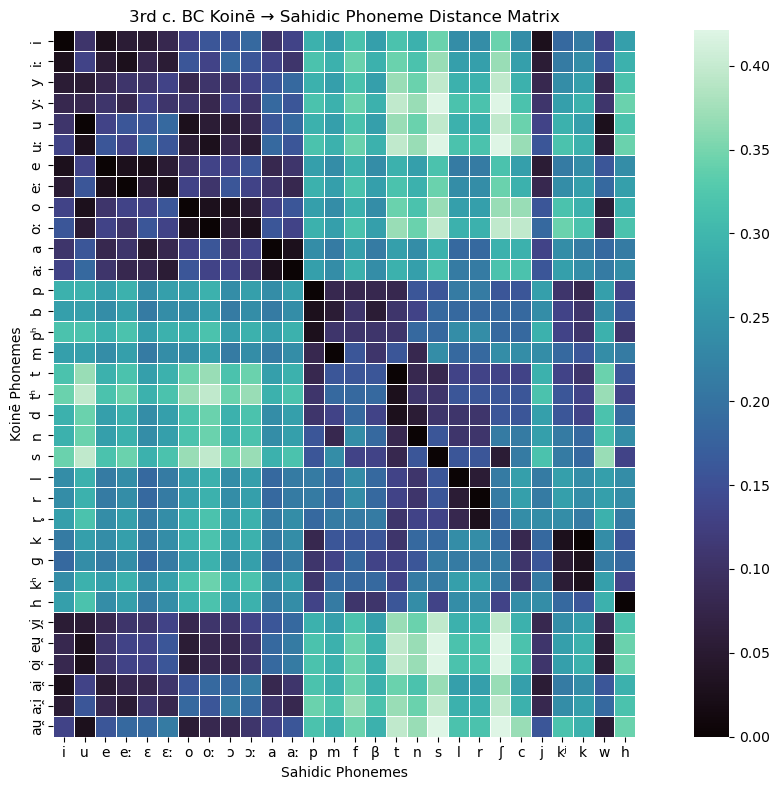

In [23]:
D = koine_3_bc_features
R = sahidic_features

# D and R are DataFrames: index=phoneme, columns=features encoded 0/1
dist_matrix = pd.DataFrame(
    cdist(D.values, R.values, metric='hamming'),
    index=D.index, columns=R.index
)

plt.figure(figsize=(12, 8))
sns.heatmap(dist_matrix, cmap='mako', annot=False, linewidths=0.5, square=True)
plt.title("3rd c. BC Koinē → Sahidic Phoneme Distance Matrix")
plt.xlabel("Sahidic Phonemes")
plt.ylabel("Koinē Phonemes")
plt.tight_layout()
plt.show()

In [24]:
def top_n_matches(row, n=3):
    sorted_indices = row.sort_values()
    top_n = sorted_indices.iloc[:n]
    out = {}
    for i, (phoneme, dist) in enumerate(top_n.items(), start=1):
        out[f'fit_{i}'] = phoneme
        out[f'dist_{i}'] = dist
    return pd.Series(out)

dist_matrix.apply(top_n_matches, axis=1)


,fit_1,dist_1,fit_2,dist_2,fit_3,dist_3
Phoneme,,,,,,
i,i,0.000000,e,0.026316,j,0.026316
iː,i,0.026316,eː,0.026316,e,0.052632
y,i,0.052632,u,0.052632,e,0.078947
yː,i,0.078947,u,0.078947,eː,0.078947
u,u,0.000000,o,0.026316,w,0.026316
uː,u,0.026316,oː,0.026316,o,0.052632
e,e,0.000000,i,0.026316,eː,0.026316
eː,eː,0.000000,e,0.026316,ɛː,0.026316
o,o,0.000000,u,0.026316,oː,0.026316


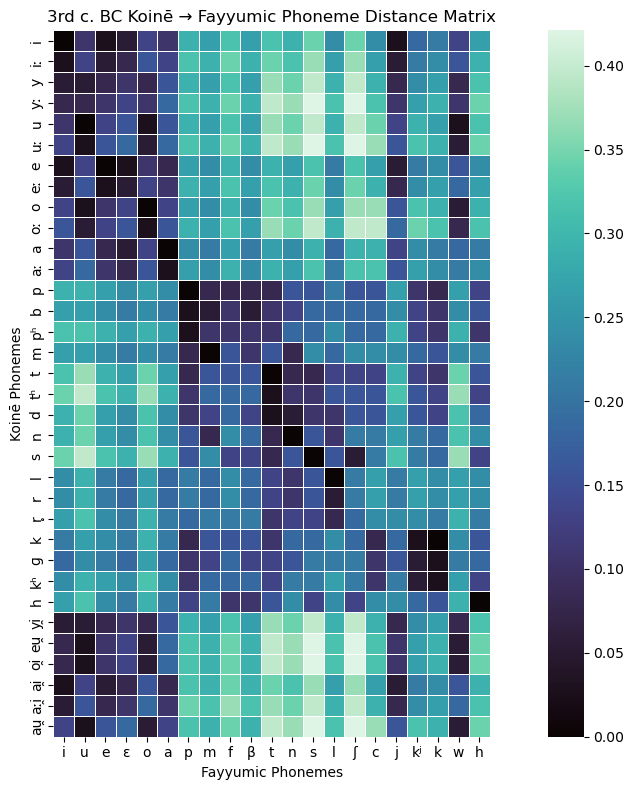

In [25]:
D = koine_3_bc_features
R = fayyumic_features

# D and R are DataFrames: index=phoneme, columns=features encoded 0/1
dist_matrix = pd.DataFrame(
    cdist(D.values, R.values, metric='hamming'),
    index=D.index, columns=R.index
)

plt.figure(figsize=(12, 8))
sns.heatmap(dist_matrix, cmap='mako', annot=False, linewidths=0.5, square=True)
plt.title("3rd c. BC Koinē → Fayyumic Phoneme Distance Matrix")
plt.xlabel("Fayyumic Phonemes")
plt.ylabel("Koinē Phonemes")
plt.tight_layout()
plt.show()

In [26]:
dist_matrix.apply(top_n_matches, axis=1)

,fit_1,dist_1,fit_2,dist_2,fit_3,dist_3
Phoneme,,,,,,
i,i,0.000000,e,0.026316,j,0.026316
iː,i,0.026316,e,0.052632,j,0.052632
y,i,0.052632,u,0.052632,e,0.078947
yː,i,0.078947,u,0.078947,e,0.105263
u,u,0.000000,o,0.026316,w,0.026316
uː,u,0.026316,o,0.052632,w,0.052632
e,e,0.000000,i,0.026316,ɛ,0.026316
eː,e,0.026316,i,0.052632,ɛ,0.052632
o,o,0.000000,u,0.026316,w,0.052632
